In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

# Exploratory Data Analysis (EDA)

## Read data

In [120]:
INPUT_FOLDER ="../data/processed"
data_file = "train_data.csv"

In [121]:
data = pd.read_csv(os.path.join(INPUT_FOLDER,data_file),sep=";")

In [122]:
data.shape

(5197, 13)

In [123]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color,target
0,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,red,6
1,5.9,0.37,0.14,6.3,0.036,34.0,185.0,0.99440,3.17,0.63,9.8,white,5
2,6.2,0.21,0.27,1.7,0.038,41.0,150.0,0.99330,3.49,0.71,10.5,white,7
3,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,white,5
4,7.9,0.20,0.49,1.6,0.053,15.0,144.0,0.99300,3.16,0.47,10.5,white,5


## Explanation of feature dataset


| Number | Variable Name          | Role    | Type        | Description              | Units | Missing Values |
|--------|------------------------|---------|-------------|--------------------------|-------|----------------|
| 1      | fixed_acidity          | Feature | Continuous  | Most acids in wine are fixed or non-volatile, meaning they do not evaporate readily.                          |       | no             |
| 2      | volatile_acidity       | Feature | Continuous  | The amount of acetic acid in wine; at high levels, it can impart an unpleasant vinegar taste.                         |       | no             |
| 3      | citric_acid            | Feature | Continuous  | Found in small quantities, citric acid can add freshness and flavor to wines.                        |       | no             |
| 4      | residual_sugar         | Feature | Continuous  | The amount of sugar remaining after fermentation stops; wines with less than 1 gram/liter are rare, while those with more than 45 grams/liter are considered sweet.                       |       | no             |
| 5      | chlorides              | Feature | Continuous  | The amount of salt in the wine.                         |       | no             |
| 6      | free_sulfur_dioxide    | Feature | Continuous  | The free form of SO₂ exists in equilibrium between molecular SO₂ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and oxidation of wine.                        |       | no             |
| 7      | total_sulfur_dioxide   | Feature | Continuous  | The total amount of free and bound forms of SO₂; at low concentrations, SO₂ is mostly undetectable, but at free SO₂ concentrations over 50 ppm, it becomes noticeable in the nose and taste of wine.                         |       | no             |
| 8      | density                | Feature | Continuous  | The density of wine, which is close to that of water, depending on the alcohol and sugar content.                       |       | no             |
| 9      | pH                     | Feature | Continuous  | Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines range between 3 and 4 on the pH scale.                          |       | no             |
| 10     | sulphates              | Feature | Continuous  | A wine additive that can contribute to sulfur dioxide (SO₂) levels, acting as an antimicrobial and antioxidant.                         |       | no             |
| 11     | alcohol                | Feature | Continuous  | The percentage of alcohol content in the wine.                        |       | no             |
| 12     | quality                | Target  | Integer     | Score between 0(very bad) and 10(excellent), output variable (based on sensory data  |       | no             |
| 13     | color                  | Other   | Categorical | red or white             |       | no             |

## Univariate Analysis

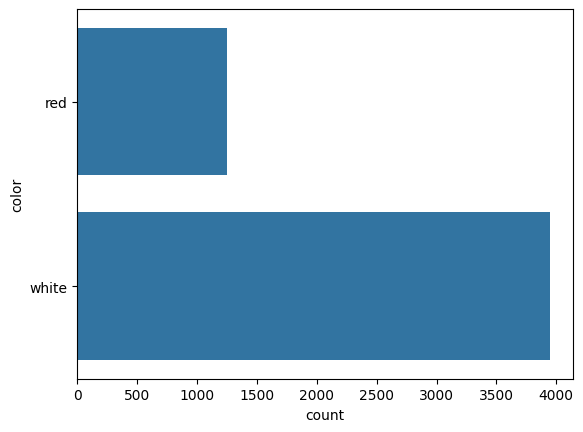

In [124]:
sns.countplot(data['color'])
plt.show()

In [125]:
data.drop(columns=["color"],inplace=True)

## Some interesting statistics

In [126]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,5197.0,7.194930,1.284863,3.80000,6.4000,7.00000,7.60000,15.60000
volatile_acidity,5197.0,0.337532,0.164929,0.08000,0.2300,0.29000,0.40000,1.58000
citric_acid,5197.0,0.319688,0.145660,0.00000,0.2500,0.31000,0.39000,1.23000
residual_sugar,5197.0,5.440081,4.764171,0.60000,1.8000,3.00000,8.10000,65.80000
chlorides,5197.0,0.055750,0.034741,0.00900,0.0380,0.04700,0.06400,0.61000
free_sulfur_dioxide,5197.0,30.656629,17.884412,1.00000,17.0000,29.00000,41.00000,289.00000
total_sulfur_dioxide,5197.0,116.116125,56.370440,6.00000,78.0000,119.00000,156.00000,440.00000
density,5197.0,0.994667,0.003001,0.98711,0.9923,0.99482,0.99692,1.03898
pH,5197.0,3.219432,0.161139,2.72000,3.1100,3.21000,3.32000,4.01000
sulphates,5197.0,0.530866,0.147528,0.22000,0.4300,0.51000,0.60000,2.00000


**Some conclusions**

- There is a significant gap between the 75th percentile and maximum values for the following features:

1. total_sulfur_dioxide
2. free_sulfur_dioxide
3. residual_sugar
4. fixed_acidity

- This suggests the presence of extreme outliers in our dataset.

- The average pH is 3.22, indicating that most wines are slightly acidic, which is common in most wines.

- Variables such as density and pH have much smaller standard deviations, indicating that the values ​​are more concentrated around the mean.

- The target variable has a mean of 5.82 and a median of 6, with most values ​​between 5 and 6. This suggests that most of the wines in the data set are of moderate quality.


## Null values check

**Some conclusions**

- The dataset does not contain null values, therefore it is not necessary to impute the data.

In [127]:
print(data.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64


<Axes: >

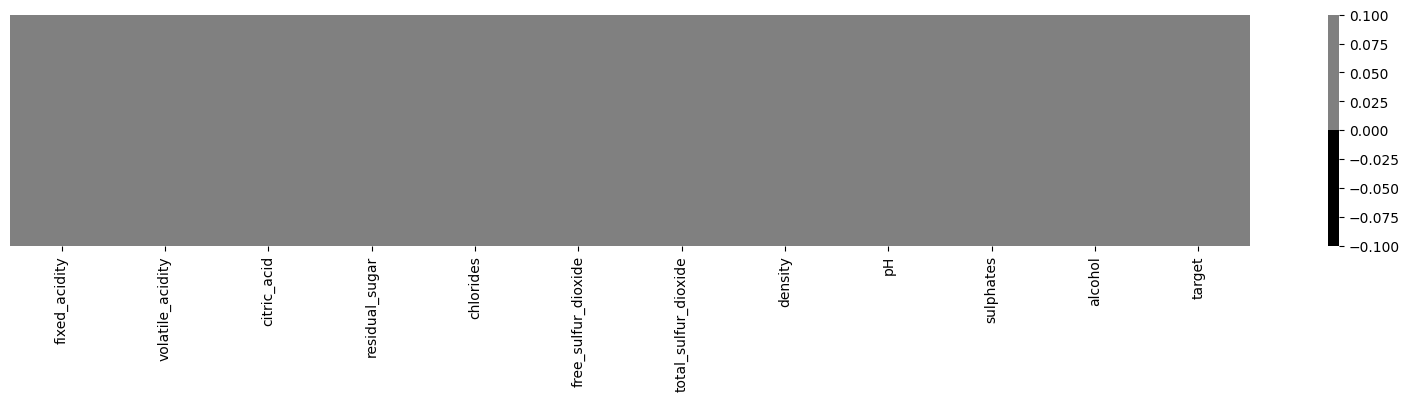

In [128]:
plt.figure(figsize=(20, 3))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap=ListedColormap(['black','gray']))

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5197 non-null   float64
 1   volatile_acidity      5197 non-null   float64
 2   citric_acid           5197 non-null   float64
 3   residual_sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free_sulfur_dioxide   5197 non-null   float64
 6   total_sulfur_dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  target                5197 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 487.3 KB


## Distribution plots

To evaluate the linearity of variables, it is recommended to plot distribution graphs and analyze the skewness of the features. Utilizing kernel density estimation (KDE) is an effective method for visualizing the shape of a distribution.

In [130]:
def feat_plot(feature):

    plt.figure(figsize=(13, 4))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    plt.subplot(1, 3, 2)

    sns.histplot(feature,
             bins = 10,
             kde = True,   
             stat="density",
             cbar = True).set(title = "Distribution of 'chlorides'");
    plt.title(f'{feature.name} distribution plot')

    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

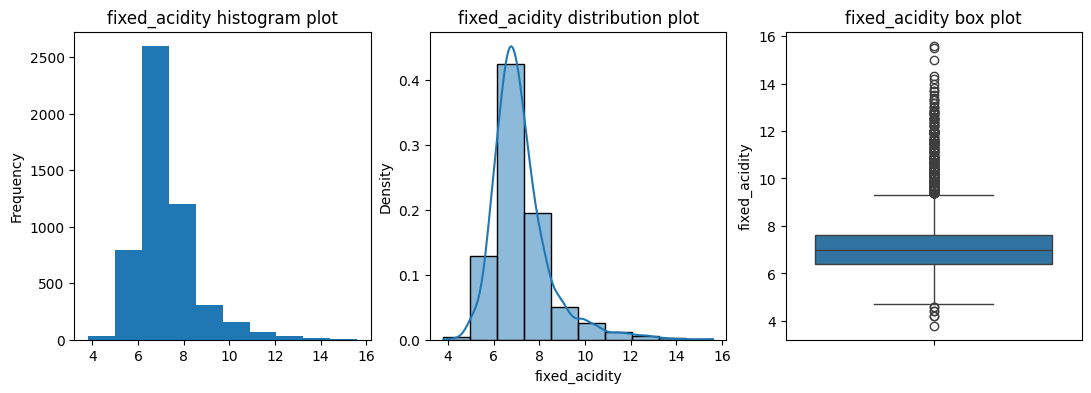

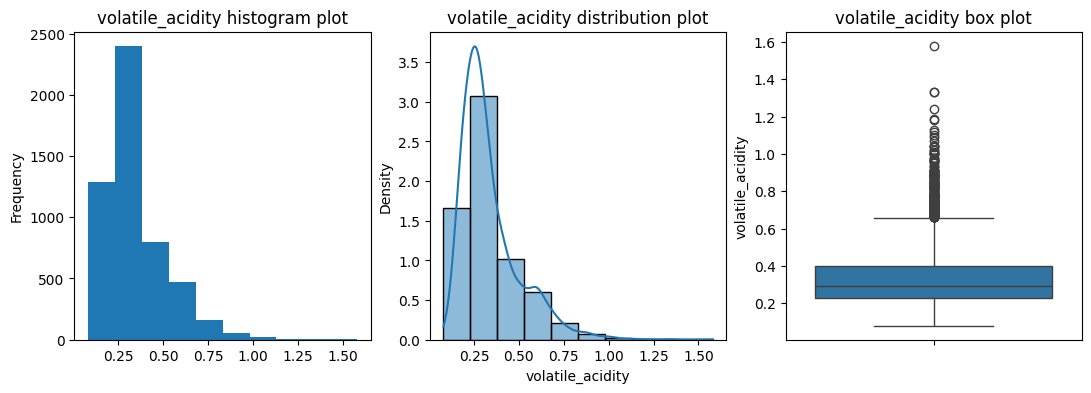

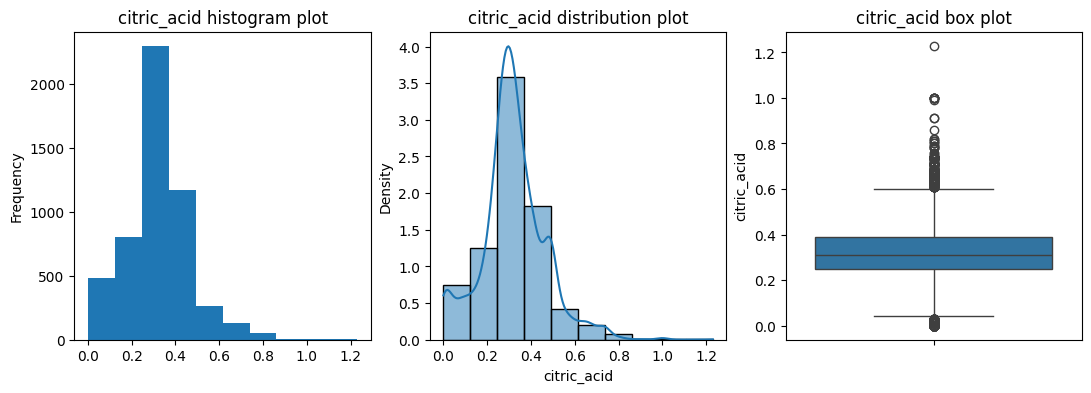

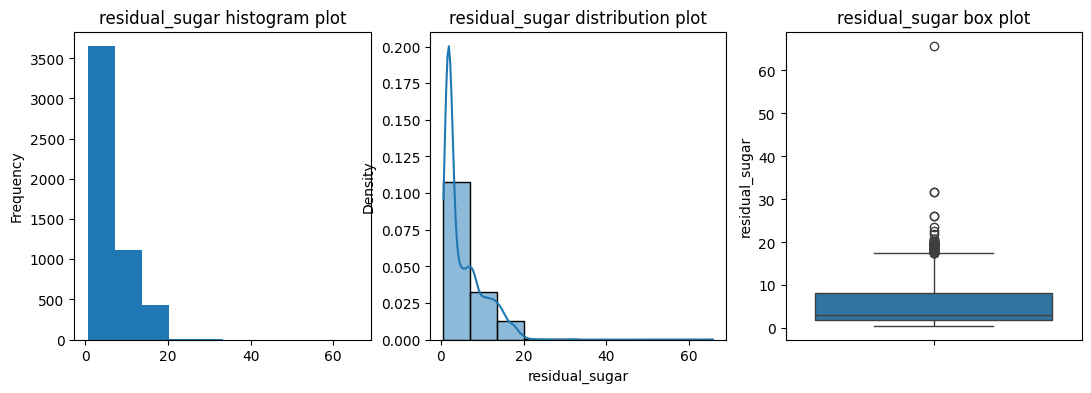

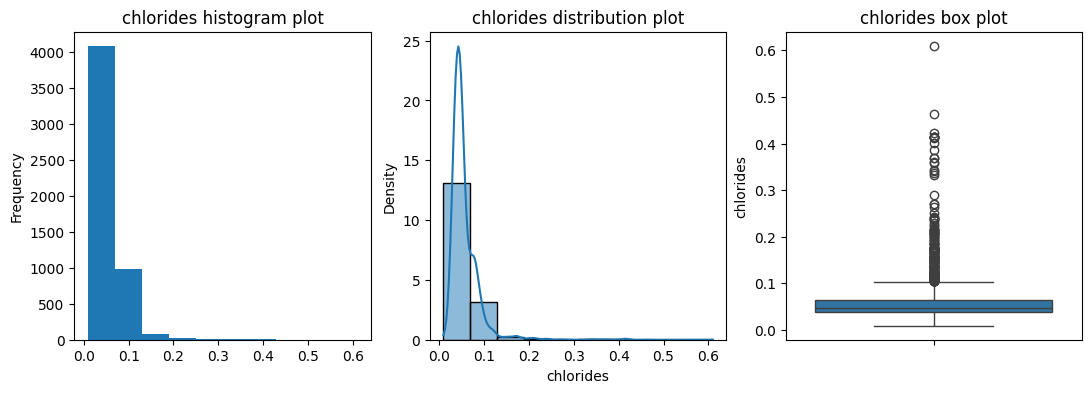

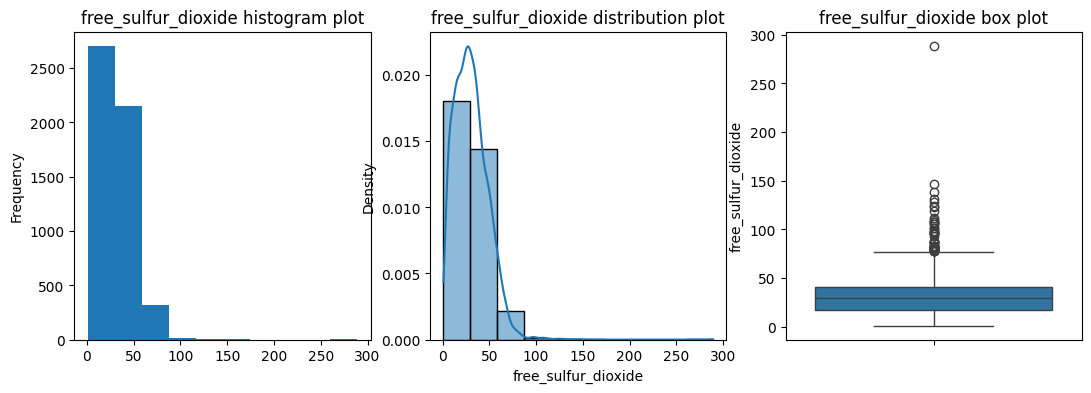

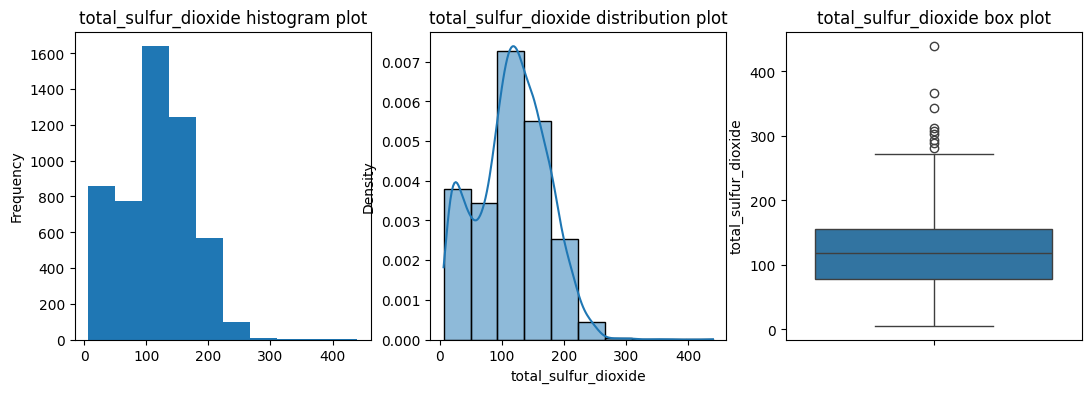

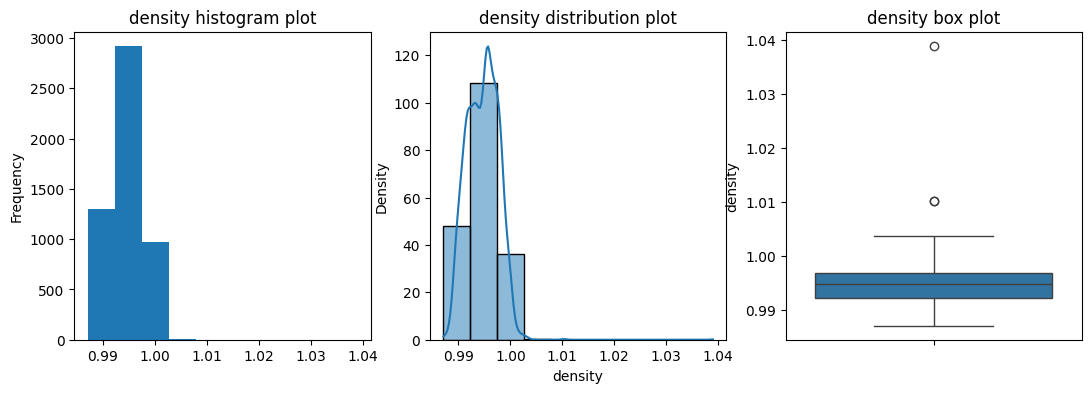

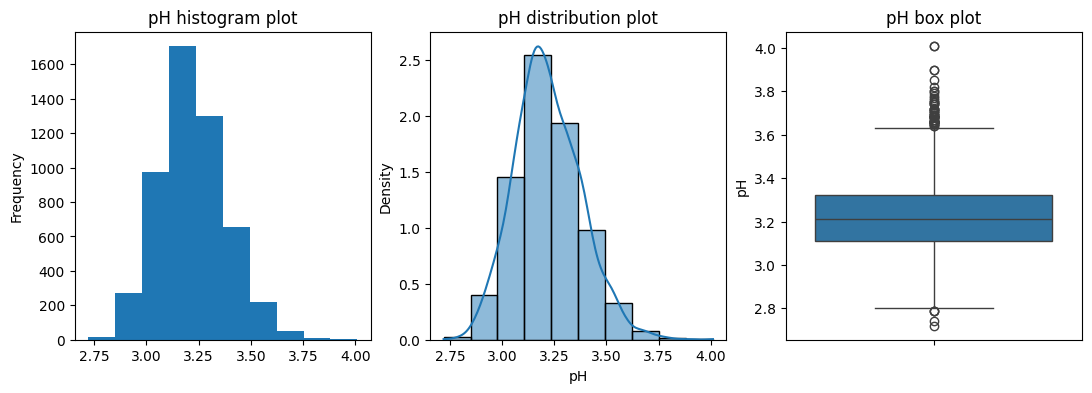

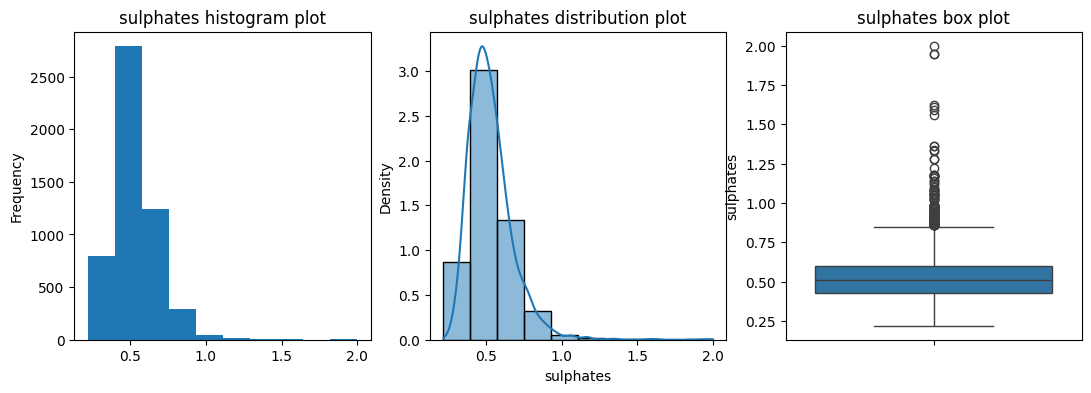

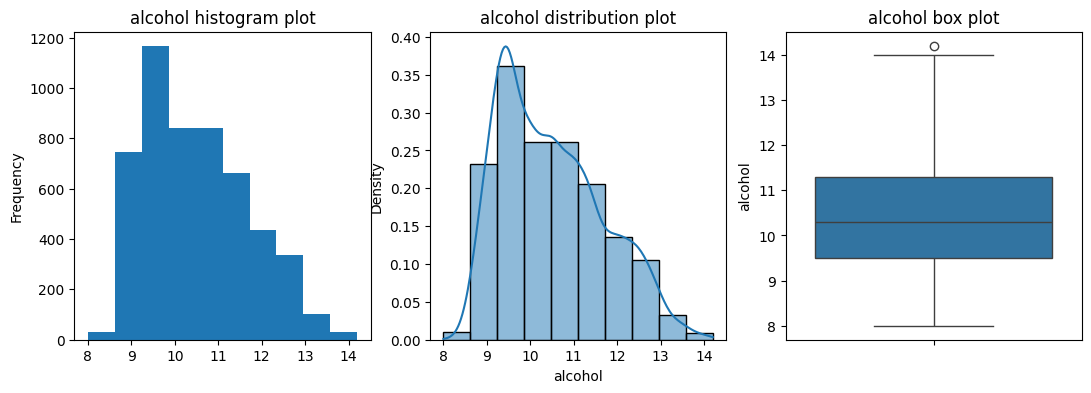

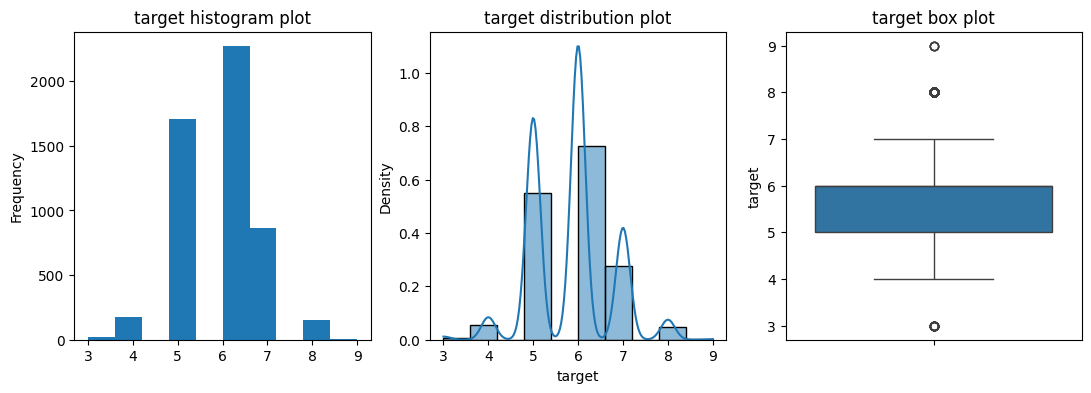

In [131]:
for i in data.columns:
    feat_plot(data[i])

**Some conclusions**

1. The "pH" column seems to follow a normal distribution.
2. The "fixed_acidity" values are relatively normally distributed, though slightly left-skewed.
3. The distributions of chlorides and residual sugars show a skewed pattern (left-skewed)
4. In this analysis, we observe that every column, except for alcohol, contains outliers primarily at the upper end of the range.

## Pair plot

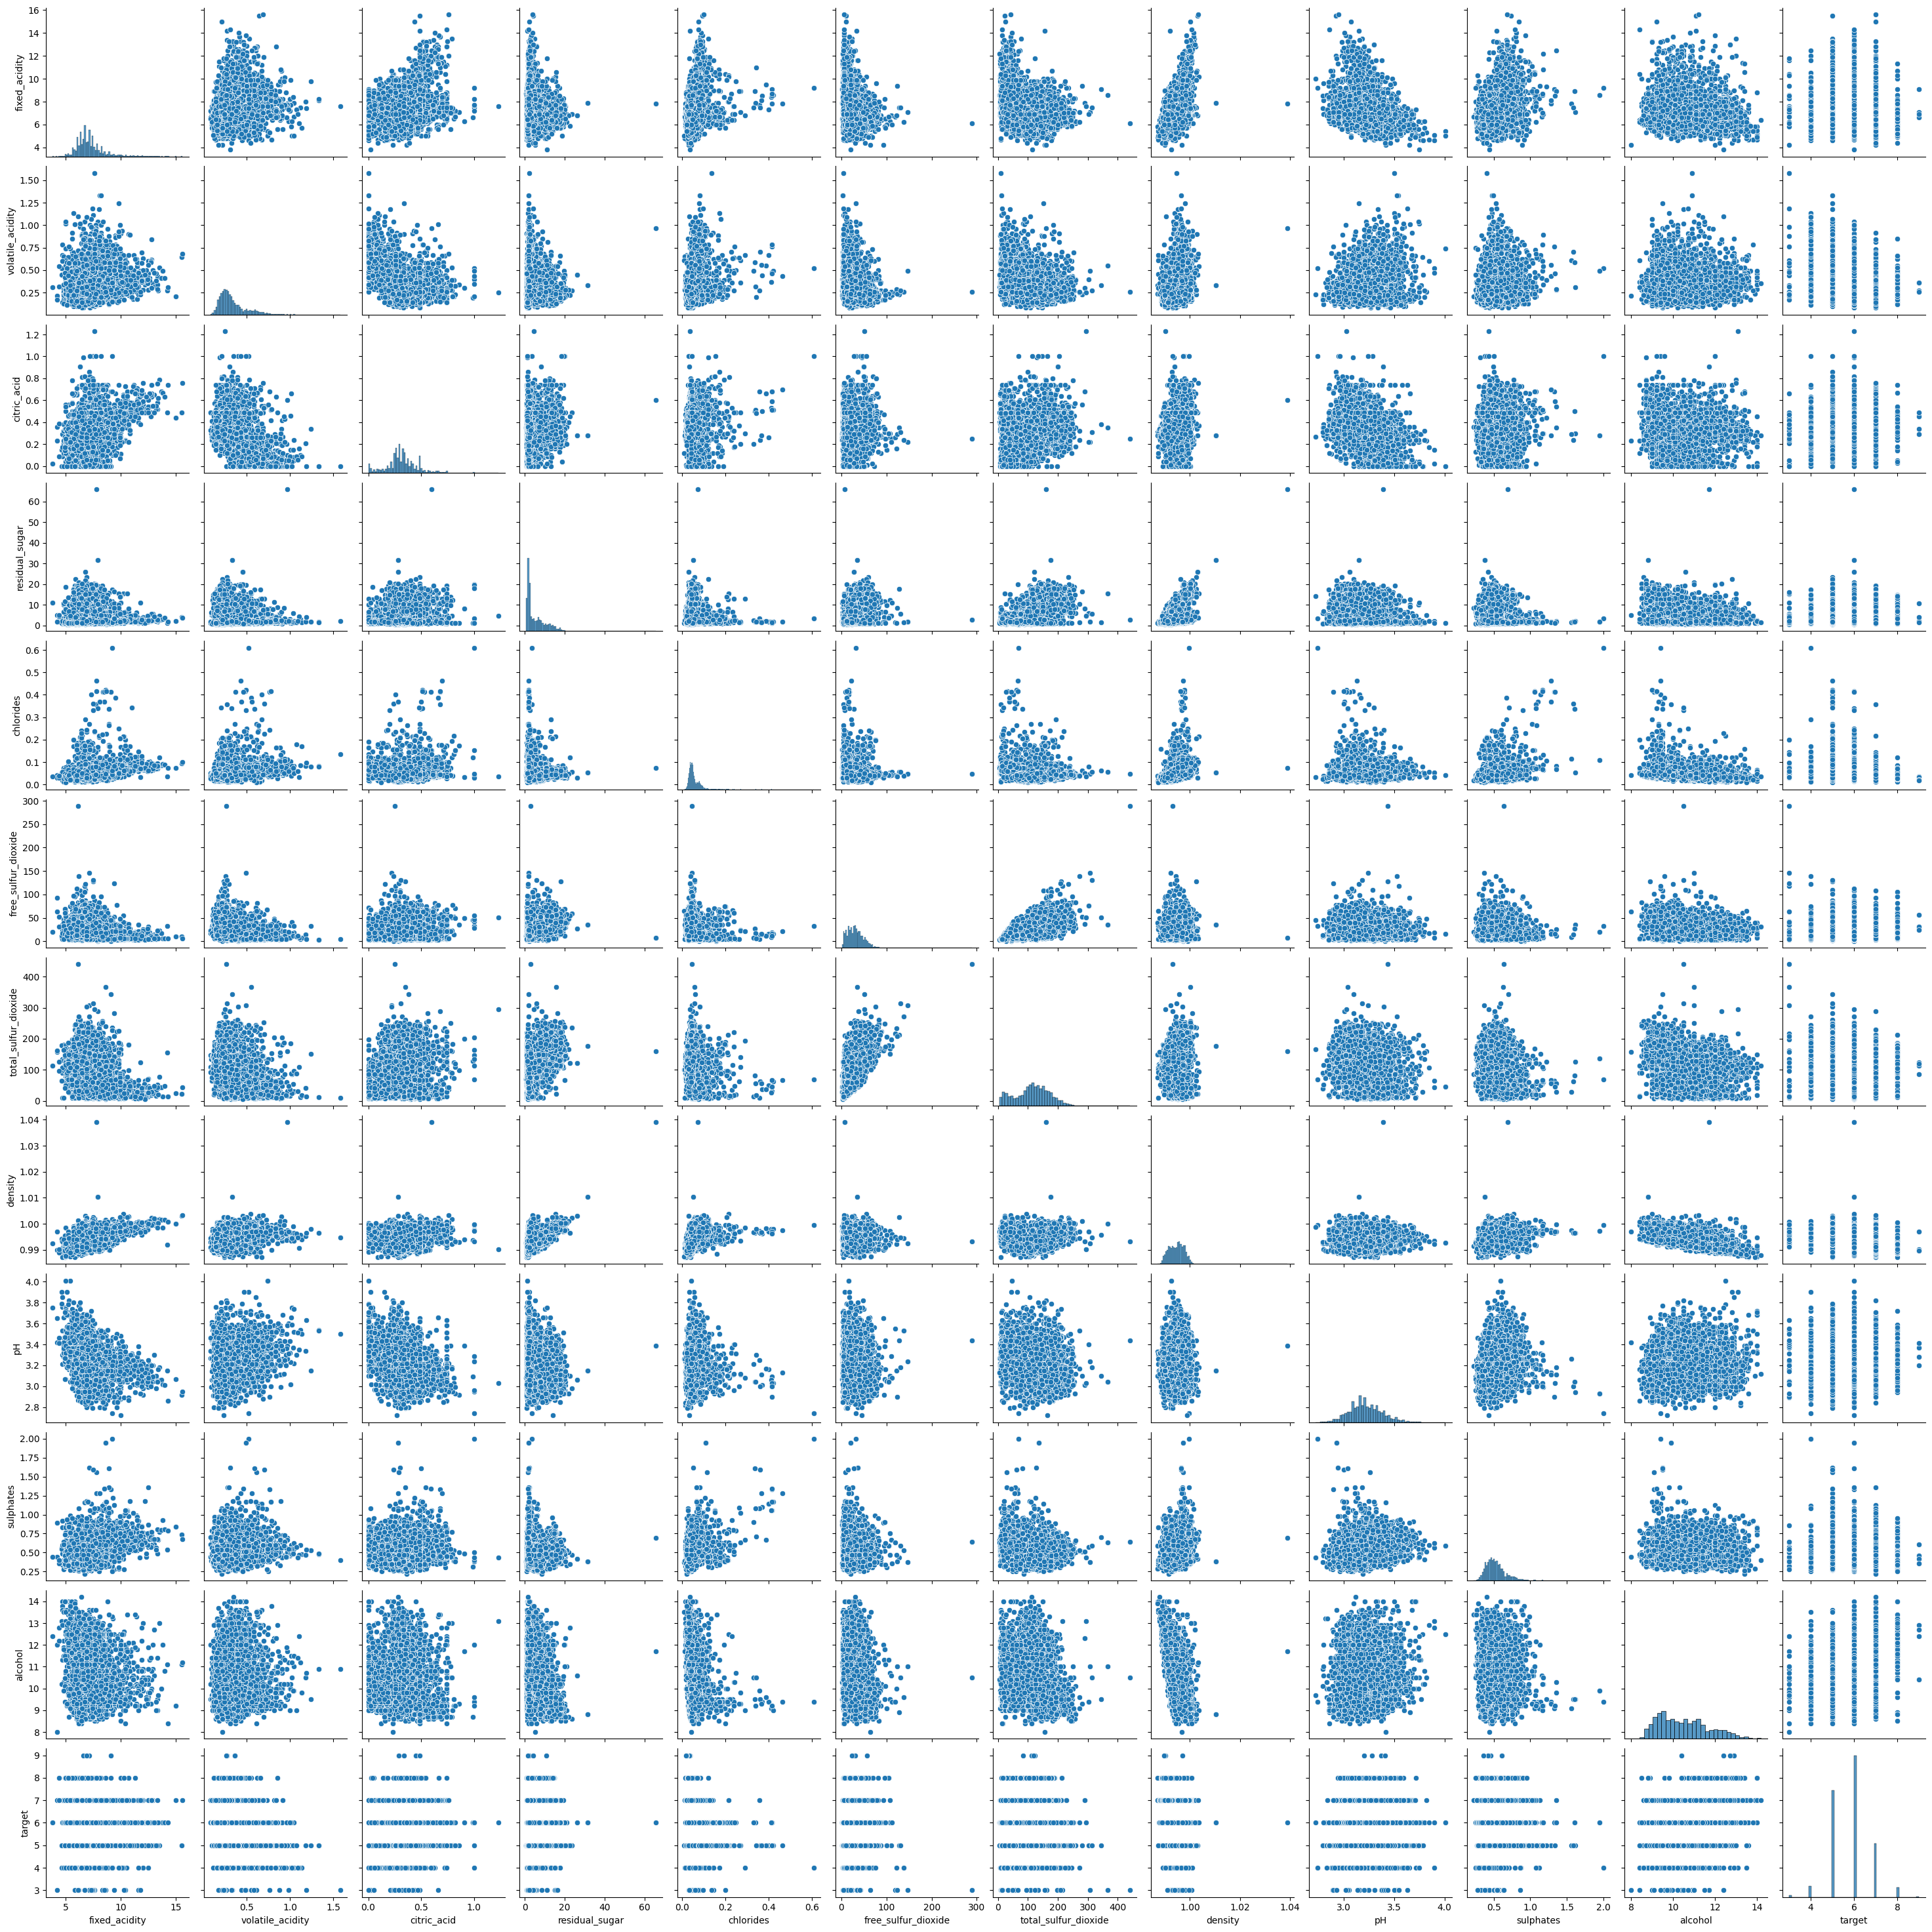

In [132]:
sns.pairplot(data)

## Correlations

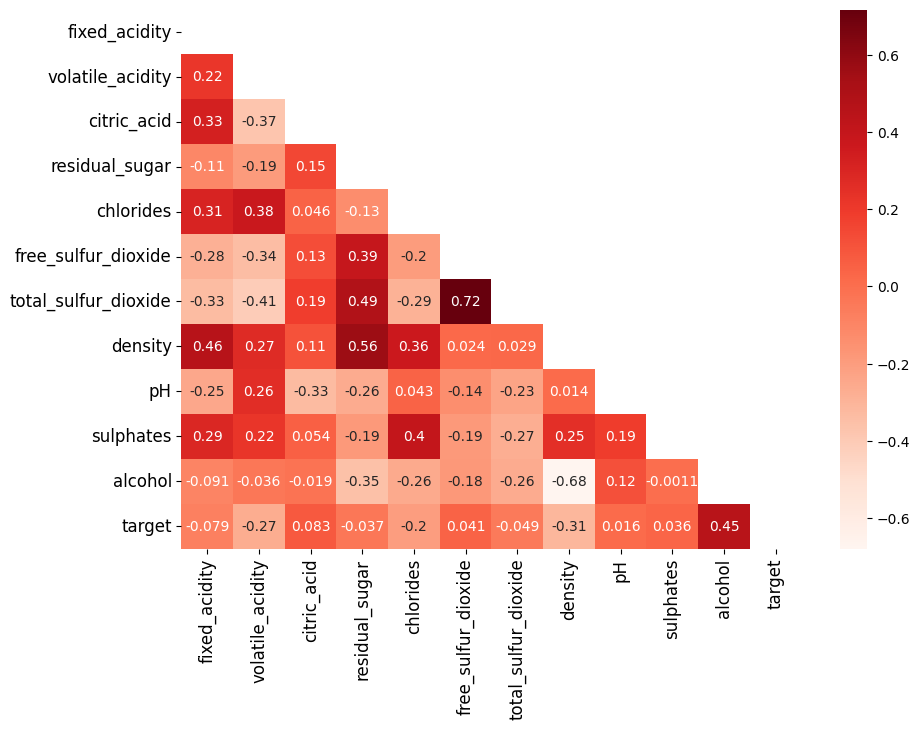

In [135]:
plt.figure(figsize=(10, 7))
corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(), mask=corr_mask, annot=True, cmap='Reds',fmt='.2g', xticklabels='auto')

plt.yticks(rotation=360, fontsize= 12)
plt.xticks(rotation=90, fontsize= 12)
plt.show()
     

**Some conclusions**:

1. There is a multicollinearity issue present, specifically, we observe a relatively strong positive correlation of 0.72 between the 'free_sulfur_dioxide' and 'total_sulfur_dioxide' variables, indicating that as one of these variables increases, the other tends to increase as well. Consequently, we will refrain from using them simultaneously in the model.
2. The target variable has the strongest positive correlation with alcohol (0.45), indicating that higher alcohol content tends to increase the target; therefore, it should not be eliminated.
3. citric_acid and fixed_acidity have a positive correlation of 0.33.
4. density and alcohol have a negative correlation of -0.68, suggesting that as density increases, alcohol content tends to decrease.
5. pH and fixed_acidity have a negative correlation of -0.25.
6. pH and citric_acid have a negative correlation of -0.33.
7. target has a negative correlation with density (-0.31).
8. sulphates has a moderate correlation with chlorides (0.4).
9. density and residual_sugar: There's a strong positive correlation of 0.56, suggesting that as the residual sugar content increases, the density of the wine also tends to increase, we could remove one due to their strong negative correlation with each other.

In [136]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

fixed_acidity


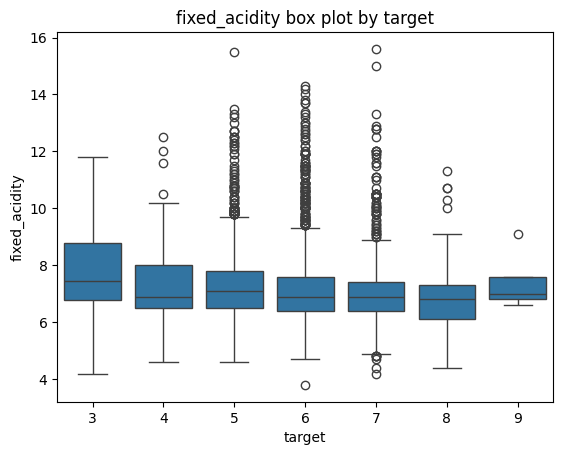

volatile_acidity


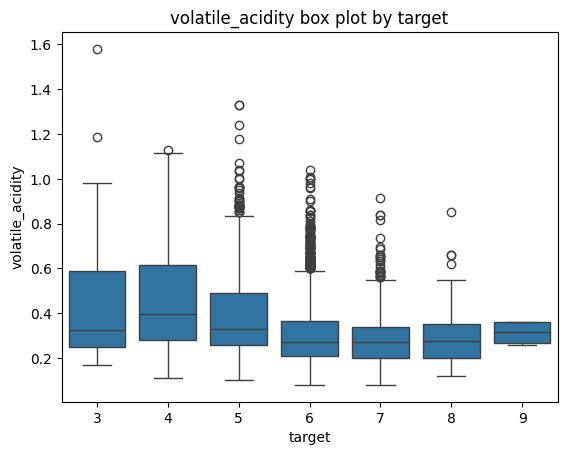

citric_acid


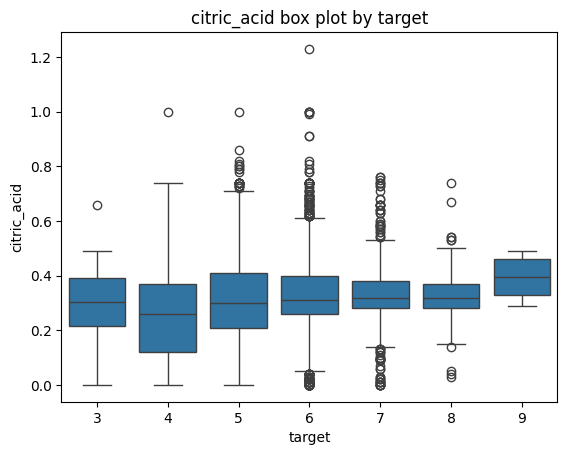

residual_sugar


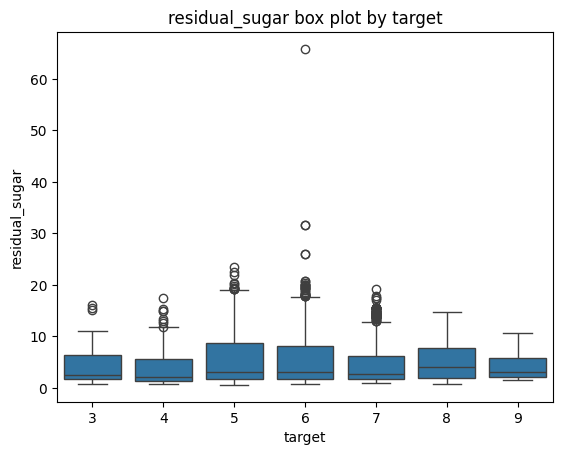

chlorides


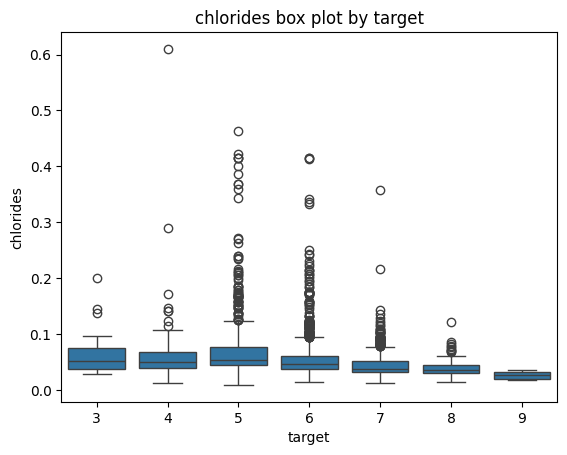

free_sulfur_dioxide


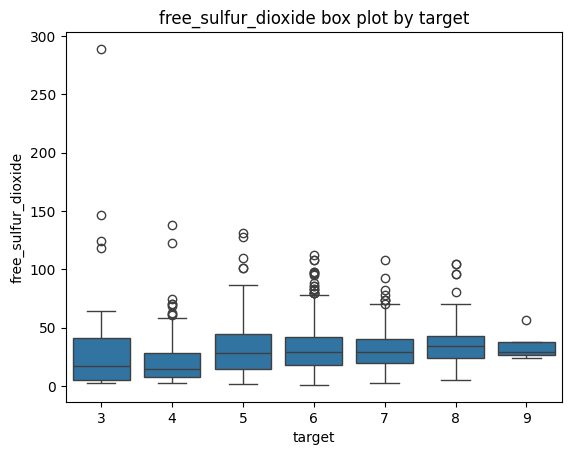

total_sulfur_dioxide


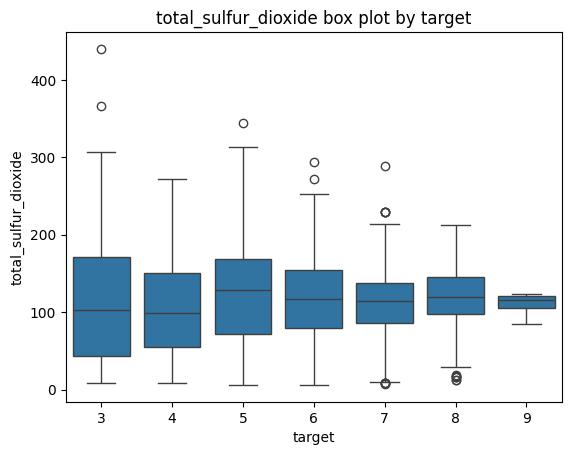

density


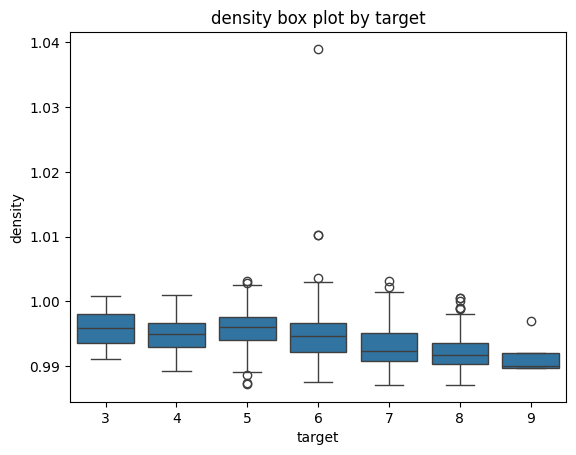

pH


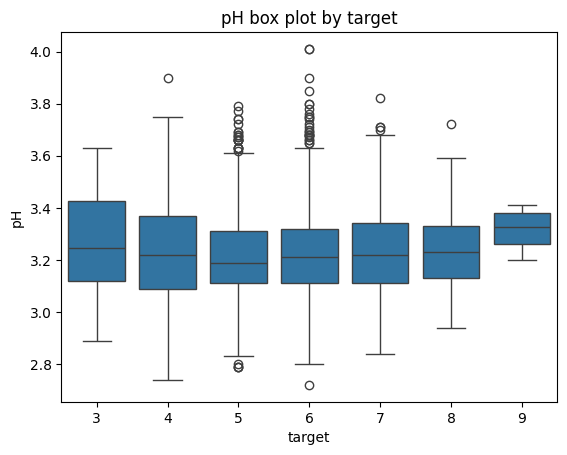

sulphates


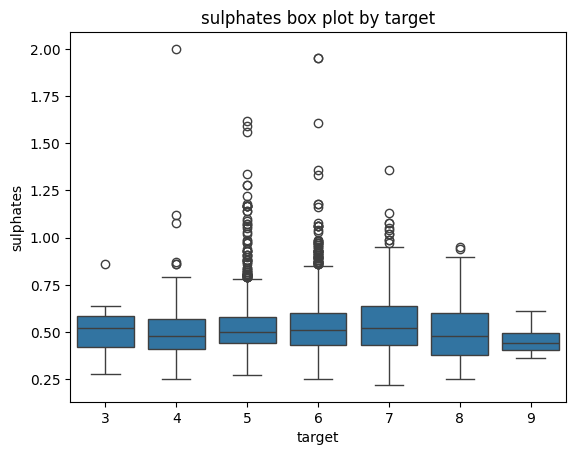

alcohol


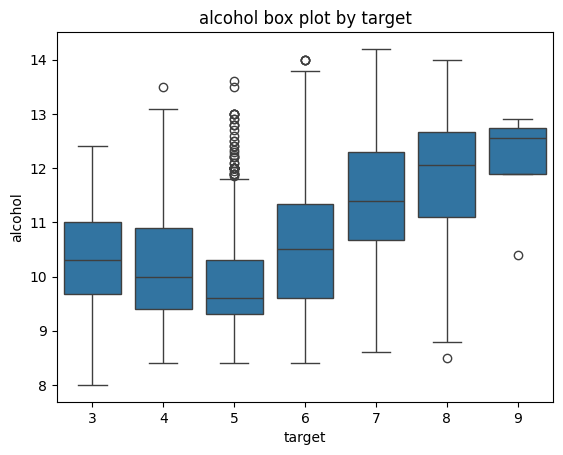

target


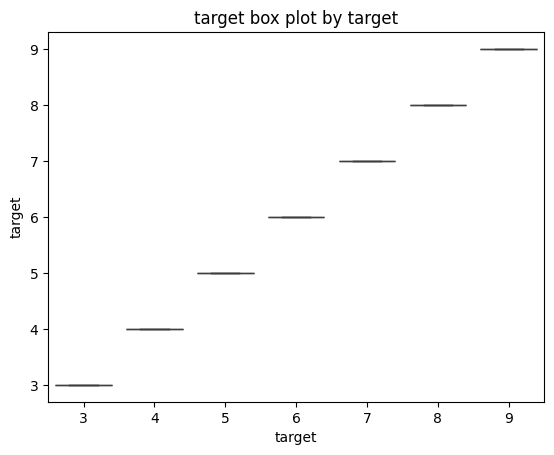

In [146]:
for feature in data.columns:
    sns.boxplot(y=data[feature], x=data.target)
    plt.title(f'{feature} box plot by target')
    print(feature)
    plt.show()

# Decisions
1. Remove color column (white, red)
2. Due to multicollinearity, we are going to remove the columns:
    - total_sulfur_dioxide
    - density
3. target column will be replace:
    - target < 5, replace by: 0 (bad).
    - target >=5, replace by: 1 (good).

4. Retaining outliers is crucial for accurately capturing values 5, 6, and 7 in features like fixed acidity, volatile acidity, citric acid, and chlorides.

In [3]:
INPUT_FOLDER ="../data/processed"
OUTPUT_FOLDER = "../data/processed/after_eda/"

data_train_file = "train_data.csv"
data_test_file = "test_data.csv"


df_train = pd.read_csv(os.path.join(INPUT_FOLDER, data_train_file),sep=";")
df_test = pd.read_csv(os.path.join(INPUT_FOLDER, data_test_file), sep=";")


In [4]:
def eda_transformation(data):
    data.drop(columns=["color","total_sulfur_dioxide", "density"],inplace=True)
    data["target"] = np.where(data["target"] >5, 1, 0)
    return data

In [5]:
df_train = eda_transformation(df_train)
df_test = eda_transformation(df_test)

In [6]:
df_train.to_csv(os.path.join(OUTPUT_FOLDER,data_train_file), sep=";", index=False)
df_test.to_csv(os.path.join(OUTPUT_FOLDER, data_test_file), sep=";", index=False)